In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import the data
import chardet

with open('SeoulBikeData.csv', 'rb') as f:
    data = f.read(100)

result = chardet.detect(data)
encoding = result['encoding']

print(encoding)

df = pd.read_csv("SeoulBikeData.csv" , encoding=encoding)

ISO-8859-9


In [3]:
df

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
type(df['Date'])

pandas.core.series.Series

In [6]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

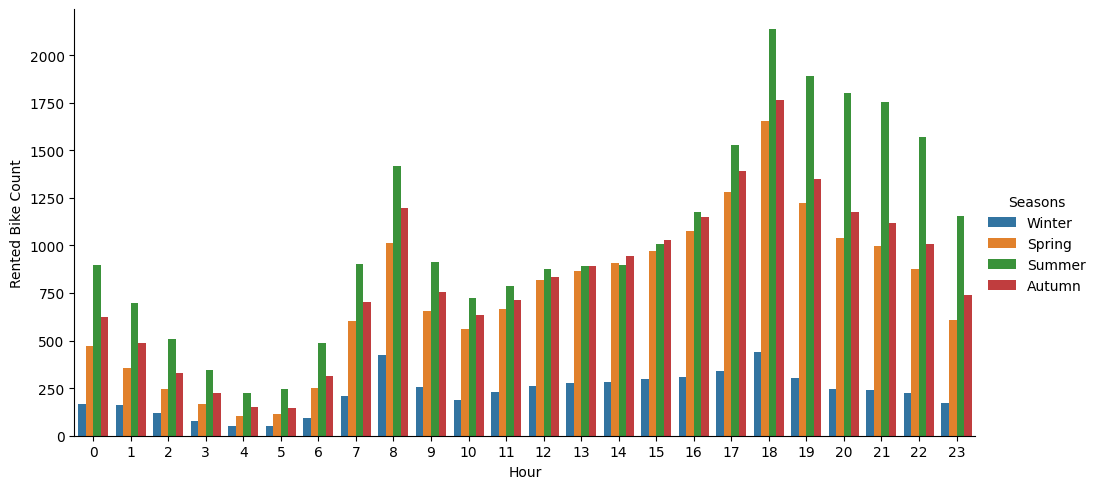

In [7]:
sns.catplot(data=df, x = 'Hour', y = 'Rented Bike Count',
            hue = 'Seasons',  kind='bar', height=5, errorbar=None,
    aspect=2)

Winter has the minimum number of rented bikes and summer is the highes. From morining to evening almost every hour rented number of bikes for almost every season.

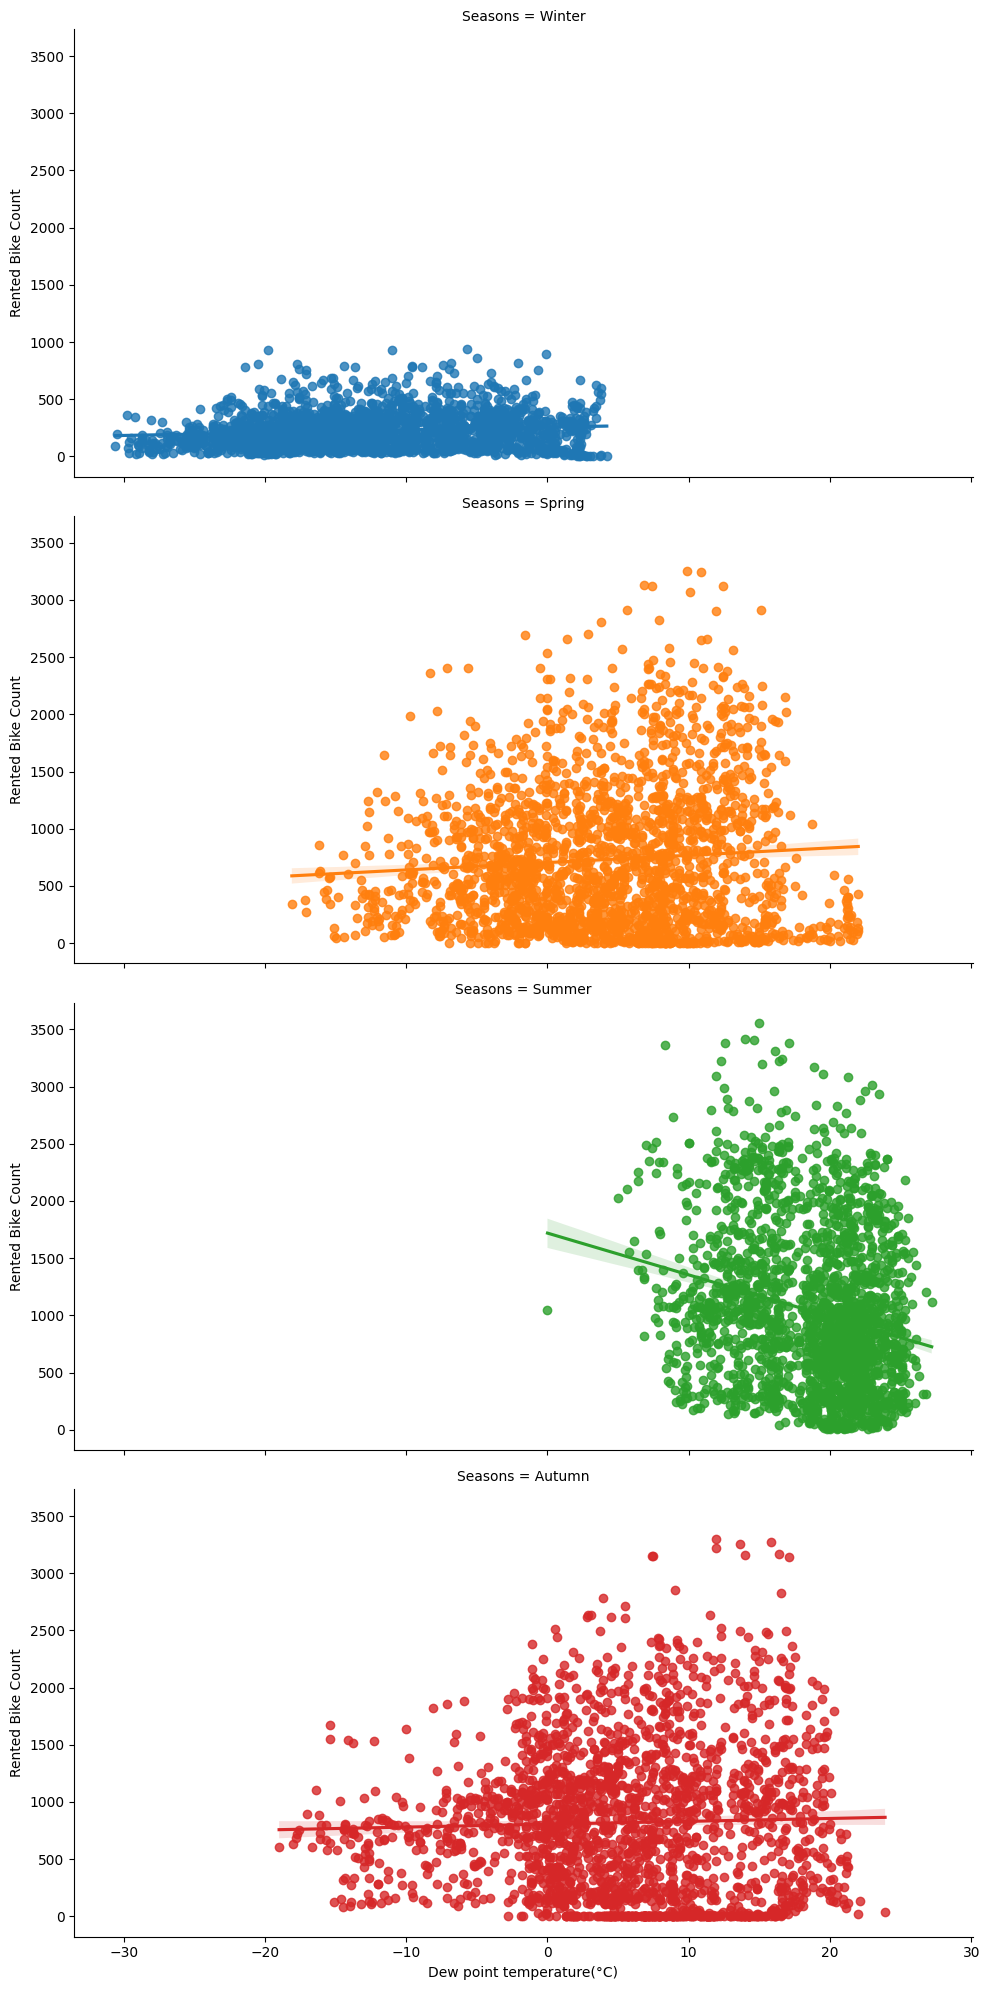

In [8]:
sns.lmplot(data = df, x = 'Dew point temperature(°C)', y = 'Rented Bike Count',
           hue = 'Seasons', aspect = 2, row = 'Seasons')

Only in Summer number decreses as the temp. increses.

In [9]:
df.corr(numeric_only=True)['Rented Bike Count'].sort_values()

Humidity(%)                 -0.199780
Snowfall (cm)               -0.141804
Rainfall(mm)                -0.123074
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Solar Radiation (MJ/m2)      0.261837
Dew point temperature(°C)    0.379788
Hour                         0.410257
Temperature(°C)              0.538558
Rented Bike Count            1.000000
Name: Rented Bike Count, dtype: float64

Temperature has the strongest relation with our output.

In [ ]:
sns.pairplot(data=df, hue='Seasons')

In [ ]:
df.head()

In [ ]:
df.dtypes

In [ ]:
df = df.drop(labels=['Date'], axis=1)

In [ ]:
df.head()

In [ ]:
print(df['Seasons'].unique())

In [ ]:
print(df['Holiday'].unique())

In [ ]:
sns.catplot(data=df, x = 'Hour', y = 'Rented Bike Count',
            hue = 'Holiday',  kind='bar', height=5, errorbar=None,
    aspect=2)

In [ ]:
sns.catplot(data=df, x = 'Hour', y = 'Rented Bike Count',
            hue = 'Functioning Day',  kind='bar', height=5, errorbar=None,
    aspect=2)

In [ ]:
print(df['Functioning Day'].unique())

In [ ]:
season_dummies = pd.get_dummies(df['Seasons'], drop_first=True)

In [ ]:
df = pd.concat([df , season_dummies], axis=1)

In [ ]:
df.head()

In [ ]:
df.drop('Seasons', axis=1)

In [ ]:
print(df['Holiday'].unique())
print(df['Functioning Day'].unique())

In [ ]:
df['Holiday'] = df['Holiday'].map({'Holiday':1, 'No Holiday':0})
df['Functioning Day'] = df['Functioning Day'].map({'Yes':1, 'No':0})

In [ ]:
df.head()

In [ ]:
df = df.drop('Seasons', axis=1)

Here we are predicting a number so we will use three algorithms. Linear regression, Random Forest

In [ ]:
y = df['Rented Bike Count']
X = df.drop('Rented Bike Count', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
X_test.shape

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(X_train, y_train)

In [ ]:
predications = lm.predict(X_test)

In [ ]:
print(predications)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("R² Score:", r2_score(y_test, predications))
print("MAE:", mean_absolute_error(y_test, predications))
print("MSE:", mean_squared_error(y_test, predications))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predications)))

let us try Decision Tree 

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dm = DecisionTreeRegressor()

In [ ]:
dm.fit(X_train, y_train)

In [ ]:
predications = dm.predict(X_test)

In [ ]:
print("R² Score:", r2_score(y_test, predications))
print("MAE:", mean_absolute_error(y_test, predications))
print("MSE:", mean_squared_error(y_test, predications))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predications)))

Let us try Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rm = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rm.fit(X_train, y_train)

In [ ]:
predications = rm.predict(X_test)

In [ ]:
print("R² Score:", r2_score(y_test, predications))
print("MAE:", mean_absolute_error(y_test, predications))
print("MSE:", mean_squared_error(y_test, predications))
print("RMSE:", np.sqrt(mean_squared_error(y_test, predications)))

In [ ]:
print(df['Rented Bike Count'].mean())

Random Forest is working best

#### Random Forest is R² Score: 0.85 which is very good compared to our linear refression. So Random Forest is working best model